In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns


In [3]:
%matplotlib inline

In [4]:
main_df = pd.read_csv('PA1_train.csv.xls')

In [5]:
main_df.head()

,dummy,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,3066410850,7/9/2014,4,2.50,2720,10006,2.0,0,0,...,2720,0,1989,0,98074,47.6295,-122.042,2720,10759,5.9495
1,1,9345400350,7/18/2014,2,2.50,2600,5000,1.0,0,0,...,1300,1300,1926,0,98126,47.5806,-122.379,2260,5000,6.6500
2,1,7128300060,7/7/2014,5,1.75,1650,3000,1.5,0,0,...,1650,0,1902,0,98144,47.5955,-122.306,1740,4000,4.4300
3,1,2155500030,4/28/2015,4,1.75,1720,9600,1.0,0,0,...,1720,0,1969,0,98059,47.4764,-122.155,1660,10720,3.8000
4,1,3999300080,9/4/2014,6,2.25,3830,11180,1.0,0,2,...,2440,1390,1962,0,98008,47.5849,-122.113,2500,10400,8.8700


In [6]:
main_df.isnull().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [7]:
main_df.isna().any()

dummy            False
id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [8]:
main_df.columns

Index(['dummy', 'id', 'date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [9]:
print(len(main_df.columns))

22


In [10]:
df = main_df.drop(['dummy','id'],1) #dropped dummy variable and id

In [11]:
df['date'] = pd.to_datetime(main_df['date'])

In [12]:
df['month'] = df['date'].apply(lambda x:x.month)

In [13]:
df['year'] =  df['date'].apply(lambda x:x.year)
df['day'] = df['date'].apply(lambda x:x.day)

In [14]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')

In [15]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,year,day
count,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.375200,2.118875,2080.223200,1.508920e+04,1.503700,0.007000,0.229400,3.40910,7.67320,1793.099300,...,81.226700,98078.293100,47.559814,-122.213286,1994.326100,12746.323400,5.385297,6.592400,2014.318500,15.802100
std,0.943246,0.765128,911.334358,4.120389e+04,0.542647,0.083377,0.755932,0.65359,1.18006,830.865434,...,394.379804,53.518391,0.138651,0.141405,691.900301,28241.243043,3.573901,3.111435,0.465918,8.621761
min,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.00000,4.00000,370.000000,...,0.000000,98001.000000,47.155900,-122.514000,460.000000,660.000000,0.820000,1.000000,2014.000000,1.000000
25%,3.000000,1.750000,1430.000000,5.035500e+03,1.000000,0.000000,0.000000,3.00000,7.00000,1190.000000,...,0.000000,98033.000000,47.470200,-122.328000,1490.000000,5092.000000,3.250000,4.000000,2014.000000,8.000000
50%,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.00000,7.00000,1560.000000,...,0.000000,98065.000000,47.571300,-122.230000,1850.000000,7620.000000,4.500000,6.000000,2014.000000,16.000000
75%,4.000000,2.500000,2550.000000,1.075050e+04,2.000000,0.000000,0.000000,4.00000,8.00000,2230.000000,...,0.000000,98117.250000,47.677400,-122.125000,2380.000000,10095.750000,6.481880,9.000000,2015.000000,23.000000
max,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,13.00000,8860.000000,...,2015.000000,98199.000000,47.777600,-121.319000,6110.000000,871200.000000,68.900000,12.000000,2015.000000,31.000000


In [16]:
df = df.drop(['date'],1)
print(df.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'month', 'year', 'day'],
      dtype='object')


In [17]:
print(len(df.columns))

22


In [18]:
df.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,month,year,day
bedrooms,1.000000,0.492908,0.566724,0.026586,0.171673,-0.009237,0.082935,0.027587,0.345664,0.468981,...,0.011714,-0.151854,-0.014800,0.135611,0.387012,0.025704,0.304994,-0.008508,-0.001368,0.001814
bathrooms,0.492908,1.000000,0.753826,0.077894,0.514202,0.044960,0.189175,-0.132256,0.665506,0.688100,...,0.028823,-0.204217,0.014722,0.230576,0.575767,0.087405,0.524480,0.001503,-0.021985,0.003108
sqft_living,0.566724,0.753826,1.000000,0.172406,0.359159,0.080323,0.281434,-0.059997,0.764640,0.879322,...,0.030222,-0.199869,0.037184,0.252701,0.767427,0.187928,0.693156,0.002517,-0.020675,-0.004228
sqft_lot,0.026586,0.077894,0.172406,1.000000,-0.003914,0.030918,0.093269,-0.007812,0.111763,0.185731,...,0.008237,-0.127988,-0.091396,0.221079,0.145951,0.766928,0.090327,-0.011095,0.006196,0.010307
floors,0.171673,0.514202,0.359159,-0.003914,1.000000,0.019322,0.032063,-0.263973,0.463397,0.525619,...,-0.001851,-0.064221,0.047280,0.133802,0.285700,-0.014699,0.265757,0.021210,-0.029582,0.004475
waterfront,-0.009237,0.044960,0.080323,0.030918,0.019322,1.000000,0.387081,0.026360,0.056796,0.060511,...,0.061097,0.039637,-0.019403,-0.048597,0.075997,0.023875,0.222654,0.009457,-0.008483,0.012640
view,0.082935,0.189175,0.281434,0.093269,0.032063,0.387081,1.000000,0.054153,0.250313,0.168429,...,0.091935,0.077631,-0.003251,-0.072904,0.273224,0.073885,0.392961,-0.003188,-0.004157,0.004910
condition,0.027587,-0.132256,-0.059997,-0.007812,-0.263973,0.026360,0.054153,1.000000,-0.139661,-0.154599,...,-0.056667,0.015185,-0.000121,-0.117979,-0.095066,-0.003873,0.051306,0.009614,-0.026268,-0.006680
grade,0.345664,0.665506,0.764640,0.111763,0.463397,0.056796,0.250313,-0.139661,1.000000,0.758138,...,0.002488,-0.192635,0.109004,0.218135,0.719191,0.123551,0.671957,0.012392,-0.034950,-0.009886
sqft_above,0.468981,0.688100,0.879322,0.185731,0.525619,0.060511,0.168429,-0.154599,0.758138,1.000000,...,0.005719,-0.265109,-0.012607,0.357767,0.743508,0.199800,0.605777,0.009980,-0.023068,0.001827


In [19]:
before_normalization_corr=df.corr()['price']
(before_normalization_corr.sort_values())

zipcode         -0.048750
day             -0.024775
month           -0.008468
year             0.001692
long             0.025544
condition        0.051306
yr_built         0.057532
sqft_lot15       0.085476
sqft_lot         0.090327
yr_renovated     0.095046
waterfront       0.222654
floors           0.265757
sqft_basement    0.295117
bedrooms         0.304994
lat              0.307248
view             0.392961
bathrooms        0.524480
sqft_living15    0.589190
sqft_above       0.605777
grade            0.671957
sqft_living      0.693156
price            1.000000
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120b56048>,
      dtype=object)

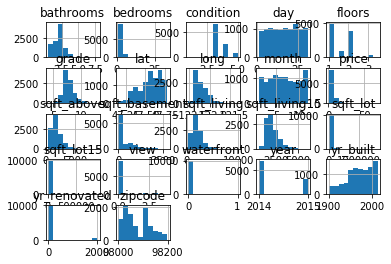

In [20]:

df.hist()

In [21]:
features = before_normalization_corr.keys()
print(len(features))
imprtant_features = [x for x in features if abs(before_normalization_corr[x])>0.1]

22


In [22]:
print(imprtant_features,len(imprtant_features))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15', 'price'] 12


In [23]:
df = df[imprtant_features]
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'price'],
      dtype='object')

In [24]:
y_train = df['price'] #y_train will contain predictor values for training set

In [25]:
y_train.value_counts().head()

3.25    84
3.50    81
4.50    80
4.25    76
4.00    71
Name: price, dtype: int64

In [26]:
df = df.drop(['price'],1) #dropped price from training data as its not needed in it
df.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [27]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,4,2.50,2720,2.0,0,0,9,2720,0,47.6295,2720
1,2,2.50,2600,1.0,0,0,8,1300,1300,47.5806,2260
2,5,1.75,1650,1.5,0,0,8,1650,0,47.5955,1740
3,4,1.75,1720,1.0,0,0,8,1720,0,47.4764,1660
4,6,2.25,3830,1.0,0,2,9,2440,1390,47.5849,2500


In [28]:
df.bedrooms.value_counts()

3     4489
4     3269
2     1282
5      730
6      117
1       90
7       14
9        3
8        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [29]:
df.isnull().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [30]:
df.isna().any()

bedrooms         False
bathrooms        False
sqft_living      False
floors           False
waterfront       False
view             False
grade            False
sqft_above       False
sqft_basement    False
lat              False
sqft_living15    False
dtype: bool

In [31]:
(df['view'].mean())

0.2294

In [32]:
for feature in df.columns:
    mn = df[feature].min()
    rnge = df[feature].max() - df[feature].min()
    df[feature] = df[feature].apply(lambda x : (x-mn)/rnge)

In [33]:
df.describe()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.074225,0.223293,0.179645,0.201480,0.007000,0.057350,0.408133,0.167621,0.105560,0.649693,0.271562
std,0.029476,0.105535,0.095728,0.217059,0.083377,0.188983,0.131118,0.097864,0.159928,0.223018,0.122460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.172414,0.111345,0.000000,0.000000,0.000000,0.333333,0.096584,0.000000,0.505549,0.182301
50%,0.062500,0.241379,0.162815,0.200000,0.000000,0.000000,0.333333,0.140165,0.000000,0.668168,0.246018
75%,0.093750,0.275862,0.228992,0.400000,0.000000,0.000000,0.444444,0.219081,0.202206,0.838829,0.339823
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.09375,0.275862,0.246849,0.4,0.0,0.0,0.555556,0.276796,0.000000,0.761782,0.400000
1,0.03125,0.275862,0.234244,0.0,0.0,0.0,0.444444,0.109541,0.477941,0.683127,0.318584
2,0.12500,0.172414,0.134454,0.2,0.0,0.0,0.444444,0.150766,0.000000,0.707093,0.226549
3,0.09375,0.172414,0.141807,0.0,0.0,0.0,0.444444,0.159011,0.000000,0.515522,0.212389
4,0.15625,0.241379,0.363445,0.0,0.0,0.5,0.555556,0.243816,0.511029,0.690043,0.361062


In [35]:
ln=[]
for exp in range(-2,8):
    ln.append(10**(-exp))
learning_rate = np.array(ln)
print(learning_rate)

[1.e+02 1.e+01 1.e+00 1.e-01 1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]


In [36]:
df['dummy'] = main_df['dummy']

In [37]:
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,dummy
0,0.09375,0.275862,0.246849,0.4,0.0,0.0,0.555556,0.276796,0.000000,0.761782,0.400000,1
1,0.03125,0.275862,0.234244,0.0,0.0,0.0,0.444444,0.109541,0.477941,0.683127,0.318584,1
2,0.12500,0.172414,0.134454,0.2,0.0,0.0,0.444444,0.150766,0.000000,0.707093,0.226549,1
3,0.09375,0.172414,0.141807,0.0,0.0,0.0,0.444444,0.159011,0.000000,0.515522,0.212389,1
4,0.15625,0.241379,0.363445,0.0,0.0,0.5,0.555556,0.243816,0.511029,0.690043,0.361062,1


In [38]:
df.shape[0]

10000

In [39]:
import math
def norm_cal(a,b):
    s = sum(a*b)
    #print('called',a)
    return s
#norm_cal(np.array([1,3]),np.array([2,4]))
        

In [40]:
((df.iloc[0]))

bedrooms         0.093750
bathrooms        0.275862
sqft_living      0.246849
floors           0.400000
waterfront       0.000000
view             0.000000
grade            0.555556
sqft_above       0.276796
sqft_basement    0.000000
lat              0.761782
sqft_living15    0.400000
dummy            1.000000
Name: 0, dtype: float64

In [41]:
# mn = min(y_train)
# mx = max(y_train)
# y_train=y_train.apply(lambda x:(x-mn)/(mx-mn))

In [42]:
y_train.head()

0    5.9495
1    6.6500
2    4.4300
3    3.8000
4    8.8700
Name: price, dtype: float64

In [43]:
final_weights = np.array([0]*12)
final_weights 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:

for lmbda in learning_rate[7:8]:
    weight = np.array(np.random.randn(1,12)[0])
    #print('weight is',weight)
    #print(weight)
    ##### calculate for current iteration
    number_of_iteration = 0
    c = 1
    while True:
        gradient = np.array(np.zeros(12))
        #print('this is the default gradient',gradient)
        for i in range(df.shape[0]):
            ith_data_instance = np.array(df.iloc[i])
            predicted_y = norm_cal(ith_data_instance,weight)
            #print('predicted y',predicted_y)
            actual_y = y_train[i]
            diff = predicted_y -actual_y
            weighted_sum = diff*ith_data_instance
            #print('weighted sum for each iteration',weighted_sum)
            gradient = gradient + weighted_sum
            #print('updated gradient',gradient)
        weight = weight - lmbda*gradient
        number_of_iteration = number_of_iteration + 1
        #print('gradient',gradient)
        #print('weight',weight)
        #break
        print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)))
        if(math.sqrt(norm_cal(gradient,gradient))<=0.5):
            final_weights = weight
            break
        if number_of_iteration==c*100:
            print('number of iteration',number_of_iteration,math.sqrt(norm_cal(gradient,gradient)))
            c = c + 1
    print(number_of_iteration)
        
            


number of iteration 1 56764.92908013021
number of iteration 2 46266.48884029146
number of iteration 3 37736.089794319014
number of iteration 4 30810.397195786074
number of iteration 5 25194.241740945035
number of iteration 6 20647.98112375546
number of iteration 7 16977.17490104962
number of iteration 8 14024.10509728708
number of iteration 9 11660.746270122561
number of iteration 10 9782.85401271235
number of iteration 11 8304.920773103344
number of iteration 12 7155.866684779996
number of iteration 13 6275.492989689713
number of iteration 14 5611.863252701357
number of iteration 15 5119.762704532551
number of iteration 16 4760.143984740215
number of iteration 17 4500.14027185127
number of iteration 18 4313.098384376015
number of iteration 19 4178.267511569319
number of iteration 20 4080.0943917574455
number of iteration 21 4007.287379943995
number of iteration 22 3951.8506370865834
number of iteration 23 3908.226257233454
number of iteration 24 3872.6021599230753
number of iteration 

number of iteration 196 1741.8695504217917
number of iteration 197 1734.8603788632233
number of iteration 198 1727.8912889859544
number of iteration 199 1720.9620269315465
number of iteration 200 1714.0723404705254
number of iteration 200 1714.0723404705254
number of iteration 201 1707.2219789923147
number of iteration 202 1700.4106934951535
number of iteration 203 1693.6382365761508
number of iteration 204 1686.9043624213598
number of iteration 205 1680.2088267959068
number of iteration 206 1673.5513870342122
number of iteration 207 1666.9318020302476
number of iteration 208 1660.3498322278506
number of iteration 209 1653.805239611116
number of iteration 210 1647.2977876948262
number of iteration 211 1640.827241514956
number of iteration 212 1634.3933676192173
number of iteration 213 1627.9959340576656
number of iteration 214 1621.6347103734051
number of iteration 215 1615.309467593265
number of iteration 216 1609.0199782186082
number of iteration 217 1602.766016216165
number of itera

number of iteration 387 910.6902744934749
number of iteration 388 908.1523810473325
number of iteration 389 905.6267375303456
number of iteration 390 903.1132713139214
number of iteration 391 900.6119102467185
number of iteration 392 898.1225826514549
number of iteration 393 895.6452173217161
number of iteration 394 893.1797435188105
number of iteration 395 890.7260909686128
number of iteration 396 888.2841898584583
number of iteration 397 885.8539708340315
number of iteration 398 883.4353649962824
number of iteration 399 881.0283038983829
number of iteration 400 878.6327195426616
number of iteration 400 878.6327195426616
number of iteration 401 876.2485443775923
number of iteration 402 873.8757112947806
number of iteration 403 871.5141536259937
number of iteration 404 869.1638051401699
number of iteration 405 866.8246000404993
number of iteration 406 864.4964729614685
number of iteration 407 862.1793589659595
number of iteration 408 859.8731935423585
number of iteration 409 857.577912

number of iteration 580 583.289651947624
number of iteration 581 582.1900549509146
number of iteration 582 581.0946813400623
number of iteration 583 580.0035098059994
number of iteration 584 578.9165191667502
number of iteration 585 577.8336883665644
number of iteration 586 576.7549964750708
number of iteration 587 575.6804226864405
number of iteration 588 574.6099463185237
number of iteration 589 573.5435468120464
number of iteration 590 572.4812037297544
number of iteration 591 571.422896755615
number of iteration 592 570.3686056939849
number of iteration 593 569.3183104688087
number of iteration 594 568.2719911228168
number of iteration 595 567.2296278167199
number of iteration 596 566.1912008284231
number of iteration 597 565.1566905522373
number of iteration 598 564.126077498097
number of iteration 599 563.0993422907903
number of iteration 600 562.0764656691813
number of iteration 600 562.0764656691813
number of iteration 601 561.0574284854495
number of iteration 602 560.042211704

number of iteration 773 429.8289526958322
number of iteration 774 429.2621333902689
number of iteration 775 428.69703745373477
number of iteration 776 428.13365755431835
number of iteration 777 427.57198639740903
number of iteration 778 427.01201672546665
number of iteration 779 426.45374131781216
number of iteration 780 425.8971529904126
number of iteration 781 425.3422445956628
number of iteration 782 424.78900902217663
number of iteration 783 424.23743919457775
number of iteration 784 423.6875280732818
number of iteration 785 423.1392686542992
number of iteration 786 422.59265396901895
number of iteration 787 422.0476770840075
number of iteration 788 421.5043311008069
number of iteration 789 420.9626091557269
number of iteration 790 420.42250441964535
number of iteration 791 419.88401009781285
number of iteration 792 419.3471194296474
number of iteration 793 418.81182568853933
number of iteration 794 418.27812218165633
number of iteration 795 417.746002249747
number of iteration 796

number of iteration 966 345.4226663844347
number of iteration 967 345.0868742501565
number of iteration 968 344.7518873780196
number of iteration 969 344.41770284612545
number of iteration 970 344.0843177455922
number of iteration 971 343.75172918048935
number of iteration 972 343.41993426777134
number of iteration 973 343.0889301372167
number of iteration 974 342.7587139313568
number of iteration 975 342.429282805413
number of iteration 976 342.10063392723254
number of iteration 977 341.7727644772272
number of iteration 978 341.4456716483018
number of iteration 979 341.11935264580205
number of iteration 980 340.7938046874432
number of iteration 981 340.4690250032456
number of iteration 982 340.14501083548157
number of iteration 983 339.8217594386081
number of iteration 984 339.49926807920383
number of iteration 985 339.17753403590973
number of iteration 986 338.85655459936805
number of iteration 987 338.5363270721619
number of iteration 988 338.2168487687558
number of iteration 989 33

number of iteration 1156 293.3674383231145
number of iteration 1157 293.14395740337346
number of iteration 1158 292.92090166393456
number of iteration 1159 292.69826978977414
number of iteration 1160 292.47606047103704
number of iteration 1161 292.25427240301974
number of iteration 1162 292.0329042861383
number of iteration 1163 291.8119548259066
number of iteration 1164 291.591422732921
number of iteration 1165 291.3713067228215
number of iteration 1166 291.1516055162824
number of iteration 1167 290.9323178389837
number of iteration 1168 290.7134424215874
number of iteration 1169 290.4949779997138
number of iteration 1170 290.27692331392404
number of iteration 1171 290.05927710969104
number of iteration 1172 289.84203813737855
number of iteration 1173 289.625205152223
number of iteration 1174 289.4087769143055
number of iteration 1175 289.1927521885348
number of iteration 1176 288.97712974461626
number of iteration 1177 288.76190835704335
number of iteration 1178 288.54708680506445
nu

number of iteration 1344 257.6160552828826
number of iteration 1345 257.45401801918734
number of iteration 1346 257.29222868328793
number of iteration 1347 257.1306866180159
number of iteration 1348 256.969391168469
number of iteration 1349 256.8083416819895
number of iteration 1350 256.6475375081657
number of iteration 1351 256.4869779988157
number of iteration 1352 256.32666250798
number of iteration 1353 256.1665903919138
number of iteration 1354 256.0067610090743
number of iteration 1355 255.84717372011778
number of iteration 1356 255.68782788788218
number of iteration 1357 255.52872287738552
number of iteration 1358 255.369858055814
number of iteration 1359 255.2112327925093
number of iteration 1360 255.0528464589684
number of iteration 1361 254.89469842882656
number of iteration 1362 254.73678807785186
number of iteration 1363 254.57911478393714
number of iteration 1364 254.42167792708835
number of iteration 1365 254.26447688942062
number of iteration 1366 254.1075110551449
numbe

number of iteration 1532 230.89365686478538
number of iteration 1533 230.76873991706725
number of iteration 1534 230.64397873767706
number of iteration 1535 230.51937296848718
number of iteration 1536 230.39492225245002
number of iteration 1537 230.27062623360078
number of iteration 1538 230.14648455704858
number of iteration 1539 230.02249686897147
number of iteration 1540 229.8986628166163
number of iteration 1541 229.77498204829354
number of iteration 1542 229.65145421336996
number of iteration 1543 229.52807896227486
number of iteration 1544 229.40485594648032
number of iteration 1545 229.28178481851336
number of iteration 1546 229.15886523194015
number of iteration 1547 229.03609684137103
number of iteration 1548 228.91347930245118
number of iteration 1549 228.79101227185635
number of iteration 1550 228.66869540729473
number of iteration 1551 228.54652836749767
number of iteration 1552 228.42451081221805
number of iteration 1553 228.30264240222922
number of iteration 1554 228.1809

number of iteration 1718 210.00731789240004
number of iteration 1719 209.90619012860185
number of iteration 1720 209.80516667762552
number of iteration 1721 209.70424732939756
number of iteration 1722 209.60343187441327
number of iteration 1723 209.50272010373976
number of iteration 1724 209.40211180900926
number of iteration 1725 209.30160678242189
number of iteration 1726 209.20120481673948
number of iteration 1727 209.10090570528854
number of iteration 1728 209.0007092419541
number of iteration 1729 208.9006152211799
number of iteration 1730 208.8006234379672
number of iteration 1731 208.70073368787078
number of iteration 1732 208.6009457669994
number of iteration 1733 208.50125947201388
number of iteration 1734 208.40167460012393
number of iteration 1735 208.30219094908628
number of iteration 1736 208.2028083172046
number of iteration 1737 208.10352650332877
number of iteration 1738 208.0043453068476
number of iteration 1739 207.9052645276924
number of iteration 1740 207.8062839663

number of iteration 1904 192.79525497697
number of iteration 1905 192.71043990555015
number of iteration 1906 192.62569825126678
number of iteration 1907 192.54102988478476
number of iteration 1908 192.45643467709152
number of iteration 1909 192.3719124994952
number of iteration 1910 192.28746322363017
number of iteration 1911 192.20308672144745
number of iteration 1912 192.11878286521784
number of iteration 1913 192.03455152753224
number of iteration 1914 191.95039258129685
number of iteration 1915 191.8663058997371
number of iteration 1916 191.7822913563933
number of iteration 1917 191.69834882512026
number of iteration 1918 191.6144781800857
number of iteration 1919 191.53067929577347
number of iteration 1920 191.44695204697769
number of iteration 1921 191.36329630880329
number of iteration 1922 191.27971195666672
number of iteration 1923 191.19619886629184
number of iteration 1924 191.11275691371432
number of iteration 1925 191.02938597527546
number of iteration 1926 190.9460859276

number of iteration 2091 178.08733514328026
number of iteration 2092 178.01430518830784
number of iteration 2093 177.9413292143333
number of iteration 2094 177.86840713898377
number of iteration 2095 177.79553888007644
number of iteration 2096 177.7227243556197
number of iteration 2097 177.6499634838125
number of iteration 2098 177.57725618304434
number of iteration 2099 177.50460237189398
number of iteration 2100 177.43200196912613
number of iteration 2100 177.43200196912613
number of iteration 2101 177.3594548936983
number of iteration 2102 177.2869610647521
number of iteration 2103 177.21452040161842
number of iteration 2104 177.1421328238148
number of iteration 2105 177.0697982510443
number of iteration 2106 176.99751660319552
number of iteration 2107 176.92528780034348
number of iteration 2108 176.85311176274678
number of iteration 2109 176.78098841085065
number of iteration 2110 176.70891766528075
number of iteration 2111 176.63689944684924
number of iteration 2112 176.5649336765

number of iteration 2277 165.35398916610924
number of iteration 2278 165.28976190564362
number of iteration 2279 165.22557611846503
number of iteration 2280 165.16143175031434
number of iteration 2281 165.09732874705406
number of iteration 2282 165.03326705465975
number of iteration 2283 164.96924661922483
number of iteration 2284 164.9052673869603
number of iteration 2285 164.8413293041912
number of iteration 2286 164.7774323173589
number of iteration 2287 164.7135763730223
number of iteration 2288 164.64976141785098
number of iteration 2289 164.58598739863396
number of iteration 2290 164.52225426227184
number of iteration 2291 164.45856195577934
number of iteration 2292 164.39491042628833
number of iteration 2293 164.33129962104033
number of iteration 2294 164.26772948739253
number of iteration 2295 164.20419997281394
number of iteration 2296 164.14071102488901
number of iteration 2297 164.07726259130973
number of iteration 2298 164.01385461988505
number of iteration 2299 163.9504870

number of iteration 2464 154.01184613268705
number of iteration 2465 153.95454300933454
number of iteration 2466 153.89727296561225
number of iteration 2467 153.84003596472994
number of iteration 2468 153.78283196996927
number of iteration 2469 153.72566094468615
number of iteration 2470 153.6685228523089
number of iteration 2471 153.61141765633667
number of iteration 2472 153.55434532034448
number of iteration 2473 153.49730580797691
number of iteration 2474 153.4402990829499
number of iteration 2475 153.38332510905346
number of iteration 2476 153.32638385014982
number of iteration 2477 153.26947527016827
number of iteration 2478 153.21259933311546
number of iteration 2479 153.15575600306337
number of iteration 2480 153.0989452441597
number of iteration 2481 153.0421670206202
number of iteration 2482 152.98542129673305
number of iteration 2483 152.92870803685406
number of iteration 2484 152.87202720541163
number of iteration 2485 152.81537876690427
number of iteration 2486 152.7587626

number of iteration 2650 143.8870128008845
number of iteration 2651 143.83529870389899
number of iteration 2652 143.78361193160745
number of iteration 2653 143.73195245815268
number of iteration 2654 143.6803202577311
number of iteration 2655 143.6287153045798
number of iteration 2656 143.57713757298498
number of iteration 2657 143.5255870372783
number of iteration 2658 143.47406367183765
number of iteration 2659 143.42256745108642
number of iteration 2660 143.37109834949405
number of iteration 2661 143.3196563415771
number of iteration 2662 143.26824140189524
number of iteration 2663 143.21685350505496
number of iteration 2664 143.16549262570894
number of iteration 2665 143.11415873855384
number of iteration 2666 143.06285181833212
number of iteration 2667 143.01157183983167
number of iteration 2668 142.96031877788437
number of iteration 2669 142.90909260736734
number of iteration 2670 142.8578933032035
number of iteration 2671 142.80672084035953
number of iteration 2672 142.755575193

number of iteration 2836 134.71309504160558
number of iteration 2837 134.66606271798133
number of iteration 2838 134.61905360608017
number of iteration 2839 134.57206768706158
number of iteration 2840 134.52510494211333
number of iteration 2841 134.47816535245465
number of iteration 2842 134.43124889933438
number of iteration 2843 134.38435556403155
number of iteration 2844 134.33748532785307
number of iteration 2845 134.29063817213947
number of iteration 2846 134.24381407825723
number of iteration 2847 134.19701302760285
number of iteration 2848 134.15023500160555
number of iteration 2849 134.10347998172105
number of iteration 2850 134.05674794943445
number of iteration 2851 134.0100388862624
number of iteration 2852 133.96335277374925
number of iteration 2853 133.91668959346788
number of iteration 2854 133.8700493270224
number of iteration 2855 133.823431956045
number of iteration 2856 133.77683746219563
number of iteration 2857 133.73026582716642
number of iteration 2858 133.6837170

number of iteration 3023 126.30288899279073
number of iteration 3024 126.25989877114709
number of iteration 3025 126.21692869544572
number of iteration 3026 126.17397875144388
number of iteration 3027 126.13104892491857
number of iteration 3028 126.08813920166837
number of iteration 3029 126.04524956750808
number of iteration 3030 126.00238000827602
number of iteration 3031 125.95953050982806
number of iteration 3032 125.91670105803985
number of iteration 3033 125.87389163880717
number of iteration 3034 125.83110223804546
number of iteration 3035 125.788332841689
number of iteration 3036 125.74558343569096
number of iteration 3037 125.70285400602567
number of iteration 3038 125.6601445386858
number of iteration 3039 125.61745501968309
number of iteration 3040 125.57478543504918
number of iteration 3041 125.5321357708348
number of iteration 3042 125.4895060131094
number of iteration 3043 125.44689614796249
number of iteration 3044 125.40430616150138
number of iteration 3045 125.36173603

number of iteration 3208 118.67866364256281
number of iteration 3209 118.63917674322823
number of iteration 3210 118.59970765251367
number of iteration 3211 118.56025635921277
number of iteration 3212 118.52082285213314
number of iteration 3213 118.48140712009531
number of iteration 3214 118.44200915193393
number of iteration 3215 118.4026289364955
number of iteration 3216 118.36326646264236
number of iteration 3217 118.32392171924792
number of iteration 3218 118.2845946952007
number of iteration 3219 118.24528537939987
number of iteration 3220 118.20599376076024
number of iteration 3221 118.16671982820911
number of iteration 3222 118.12746357068738
number of iteration 3223 118.08822497714745
number of iteration 3224 118.04900403655675
number of iteration 3225 118.00980073789464
number of iteration 3226 117.97061507015374
number of iteration 3227 117.93144702234031
number of iteration 3228 117.89229658347305
number of iteration 3229 117.85316374258372
number of iteration 3230 117.81404

number of iteration 3394 111.6292771073461
number of iteration 3395 111.59292279179155
number of iteration 3396 111.55658440603116
number of iteration 3397 111.52026194095528
number of iteration 3398 111.48395538746126
number of iteration 3399 111.44766473645609
number of iteration 3400 111.4113899788569
number of iteration 3400 111.4113899788569
number of iteration 3401 111.37513110558935
number of iteration 3402 111.33888810758855
number of iteration 3403 111.30266097579985
number of iteration 3404 111.26644970117616
number of iteration 3405 111.2302542746809
number of iteration 3406 111.19407468728653
number of iteration 3407 111.15791092997377
number of iteration 3408 111.1217629937341
number of iteration 3409 111.08563086956613
number of iteration 3410 111.04951454848087
number of iteration 3411 111.01341402149436
number of iteration 3412 110.97732927963513
number of iteration 3413 110.94126031393877
number of iteration 3414 110.90520711545126
number of iteration 3415 110.86916967

number of iteration 3580 105.13225530482791
number of iteration 3581 105.09871627673213
number of iteration 3582 105.06519162826051
number of iteration 3583 105.03168135178296
number of iteration 3584 104.99818543967531
number of iteration 3585 104.96470388432108
number of iteration 3586 104.93123667811032
number of iteration 3587 104.89778381343909
number of iteration 3588 104.8643452827116
number of iteration 3589 104.83092107833679
number of iteration 3590 104.79751119273304
number of iteration 3591 104.76411561832236
number of iteration 3592 104.73073434753489
number of iteration 3593 104.69736737280782
number of iteration 3594 104.66401468658407
number of iteration 3595 104.63067628131415
number of iteration 3596 104.59735214945349
number of iteration 3597 104.56404228346615
number of iteration 3598 104.53074667582115
number of iteration 3599 104.49746531899562
number of iteration 3600 104.46419820547105
number of iteration 3600 104.46419820547105
number of iteration 3601 104.4309

number of iteration 3767 99.10266361832618
number of iteration 3768 99.07168759956579
number of iteration 3769 99.0407246399008
number of iteration 3770 99.00977473279072
number of iteration 3771 98.97883787169923
number of iteration 3772 98.94791405009636
number of iteration 3773 98.91700326145641
number of iteration 3774 98.88610549925961
number of iteration 3775 98.8552207569894
number of iteration 3776 98.82434902813517
number of iteration 3777 98.79349030619201
number of iteration 3778 98.76264458465917
number of iteration 3779 98.7318118570403
number of iteration 3780 98.70099211684582
number of iteration 3781 98.67018535758915
number of iteration 3782 98.63939157279
number of iteration 3783 98.60861075597214
number of iteration 3784 98.57784290066495
number of iteration 3785 98.54708800040201
number of iteration 3786 98.5163460487228
number of iteration 3787 98.48561703917093
number of iteration 3788 98.4549009652946
number of iteration 3789 98.42419782064833
number of iteration

number of iteration 3959 93.38738555465318
number of iteration 3960 93.35880241431315
number of iteration 3961 93.33023116163665
number of iteration 3962 93.30167179092902
number of iteration 3963 93.27312429649992
number of iteration 3964 93.24458867266284
number of iteration 3965 93.21606491373427
number of iteration 3966 93.18755301403586
number of iteration 3967 93.15905296789167
number of iteration 3968 93.13056476963044
number of iteration 3969 93.10208841358494
number of iteration 3970 93.07362389409101
number of iteration 3971 93.04517120548812
number of iteration 3972 93.0167303421216
number of iteration 3973 92.98830129833763
number of iteration 3974 92.95988406848825
number of iteration 3975 92.93147864692952
number of iteration 3976 92.90308502801985
number of iteration 3977 92.87470320612196
number of iteration 3978 92.8463331756022
number of iteration 3979 92.81797493083177
number of iteration 3980 92.78962846618468
number of iteration 3981 92.76129377603957
number of ite

number of iteration 4148 88.19025212365814
number of iteration 4149 88.16381862441216
number of iteration 4150 88.13739600021262
number of iteration 4151 88.11098424601691
number of iteration 4152 88.08458335678587
number of iteration 4153 88.05819332748494
number of iteration 4154 88.03181415308077
number of iteration 4155 88.00544582854363
number of iteration 4156 87.97908834884767
number of iteration 4157 87.95274170896931
number of iteration 4158 87.92640590388835
number of iteration 4159 87.90008092858696
number of iteration 4160 87.87376677805196
number of iteration 4161 87.84746344727164
number of iteration 4162 87.82117093123821
number of iteration 4163 87.79488922494615
number of iteration 4164 87.76861832339361
number of iteration 4165 87.74235822158217
number of iteration 4166 87.71610891451634
number of iteration 4167 87.68987039720236
number of iteration 4168 87.66364266465034
number of iteration 4169 87.63742571187426
number of iteration 4170 87.61121953388992
number of i

number of iteration 4339 83.33317750862813
number of iteration 4340 83.30873302034986
number of iteration 4341 83.2842984966265
number of iteration 4342 83.25987393295252
number of iteration 4343 83.23545932482281
number of iteration 4344 83.21105466773648
number of iteration 4345 83.18665995719448
number of iteration 4346 83.16227518870066
number of iteration 4347 83.13790035775943
number of iteration 4348 83.1135354598817
number of iteration 4349 83.08918049057743
number of iteration 4350 83.0648354453603
number of iteration 4351 83.04050031974725
number of iteration 4352 83.01617510925615
number of iteration 4353 82.99185980940874
number of iteration 4354 82.96755441572836
number of iteration 4355 82.9432589237421
number of iteration 4356 82.91897332897794
number of iteration 4357 82.89469762696774
number of iteration 4358 82.87043181324506
number of iteration 4359 82.84617588334652
number of iteration 4360 82.8219298328106
number of iteration 4361 82.79769365717891
number of iterat

number of iteration 4530 78.840067574156
number of iteration 4531 78.81744733103885
number of iteration 4532 78.79483623534507
number of iteration 4533 78.77223428301326
number of iteration 4534 78.74964146998653
number of iteration 4535 78.72705779220941
number of iteration 4536 78.70448324562855
number of iteration 4537 78.681917826192
number of iteration 4538 78.65936152985101
number of iteration 4539 78.63681435255815
number of iteration 4540 78.61427629026903
number of iteration 4541 78.59174733894072
number of iteration 4542 78.56922749453194
number of iteration 4543 78.54671675300563
number of iteration 4544 78.52421511032361
number of iteration 4545 78.50172256245324
number of iteration 4546 78.47923910536144
number of iteration 4547 78.45676473501895
number of iteration 4548 78.43429944739746
number of iteration 4549 78.41184323847132
number of iteration 4550 78.38939610421723
number of iteration 4551 78.36695804061307
number of iteration 4552 78.34452904363974
number of itera

number of iteration 4719 74.72296627719035
number of iteration 4720 74.70200506443406
number of iteration 4721 74.68105226816448
number of iteration 4722 74.6601078846993
number of iteration 4723 74.63917191035891
number of iteration 4724 74.61824434146496
number of iteration 4725 74.59732517434071
number of iteration 4726 74.57641440531187
number of iteration 4727 74.55551203070516
number of iteration 4728 74.53461804685041
number of iteration 4729 74.51373245007828
number of iteration 4730 74.49285523672104
number of iteration 4731 74.47198640311436
number of iteration 4732 74.45112594559353
number of iteration 4733 74.43027386049808
number of iteration 4734 74.40943014416699
number of iteration 4735 74.3885947929438
number of iteration 4736 74.3677678031707
number of iteration 4737 74.34694917119431
number of iteration 4738 74.32613889336263
number of iteration 4739 74.30533696602434
number of iteration 4740 74.28454338553064
number of iteration 4741 74.26375814823471
number of iter

number of iteration 4909 70.88740617669897
number of iteration 4910 70.86798000958665
number of iteration 4911 70.84856159132255
number of iteration 4912 70.82915091855416
number of iteration 4913 70.80974798793241
number of iteration 4914 70.79035279610974
number of iteration 4915 70.77096533973881
number of iteration 4916 70.7515856154759
number of iteration 4917 70.73221361997734
number of iteration 4918 70.71284934990184
number of iteration 4919 70.69349280191018
number of iteration 4920 70.6741439726626
number of iteration 4921 70.65480285882325
number of iteration 4922 70.63546945705741
number of iteration 4923 70.61614376403183
number of iteration 4924 70.59682577641416
number of iteration 4925 70.5775154908748
number of iteration 4926 70.55821290408495
number of iteration 4927 70.53891801271764
number of iteration 4928 70.51963081344783
number of iteration 4929 70.50035130295178
number of iteration 4930 70.48107947790703
number of iteration 4931 70.4618153349938
number of itera

KeyboardInterrupt: 

In [ ]:
#calculate sse:
sse_for_lambda = 0
for i in range(df.shape[0]):
    instance = np.array(df.iloc[i])
    predicted = norm_cal(instance,final_weight)
    actual = y_train[i]
    error = predicted - actual
    error = error**2
    sse_for_lambda = sse_for_lambda + error
    

In [ ]:
sse_for_lambda 